In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import layers, callbacks
from keras.models import Sequential
import keras_tuner as kt
import pickle
from modules.train_cnn import *
from modules.process_data import *

2024-01-02 17:43:48.654344: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-02 17:43:48.745784: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-02 17:43:48.747456: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-02 17:43:49.718755: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


ModuleNotFoundError: No module named 'modules'

In [ ]:
train_Dprime_tensors = pickle.load(open('./processed_LD_data/train_data_Dprime_labeled_tensors', 'rb'))
train_Dprime_labels = pickle.load(open('./processed_LD_data/train_data_Dprime_labeled_labels', 'rb'))

In [ ]:
import os

os.environ[
    "TF_CPP_MIN_LOG_LEVEL"
] = "3"  # this is to silence some of TF warning messages
import typer
from typing_extensions import Annotated
import pickle
import tensorflow as tf
import keras_tuner as kt
from modules.train_cnn import *
from modules.process_data import *
from modules.validate import plot_all_gamma_results

In [ ]:
Dprime_model = tf.keras.models.load_model("./results/LD_Dprime_trained_no_scale_trying_with_validation")

In [ ]:
test_dprime_tensor = pickle.load(open('./processed_LD_data/test_data_Dprime_labeled_tensors', "rb"))
test_dprime_label = pickle.load(open('./processed_LD_data/test_data_Dprime_labeled_labels', 'rb'))

In [ ]:
numpy_test_tensor = np.array(test_dprime_tensor)

In [ ]:
predictions = Dprime_model.predict(numpy_test_tensor, verbose=0)

In [ ]:
from sklearn.metrics import mean_squared_error

numpy_predictions = np.array(predictions)



In [ ]:
numpy_predictions[:,0] # 1st column or A parameter because it's not predicting b and c

array([0.31969023, 0.321952  , 0.38255107, 0.34541577, 0.33630633,
       0.26454067, 0.31143045, 0.289067  , 0.46980995, 0.4822932 ,
       0.5211168 , 0.4848873 , 0.45370173, 0.4725963 , 0.468257  ,
       0.34509134, 0.26401314, 0.32659596, 0.2854445 , 0.29452989,
       0.29553202, 0.3228053 , 0.26075336, 0.3614375 , 0.3555264 ,
       0.379345  , 0.35288677, 0.333541  , 0.32796702, 0.3878973 ,
       0.41861144, 0.43813598, 0.44197625, 0.4671821 , 0.43793583,
       0.45301723, 0.41322502, 0.2751532 , 0.3072883 , 0.27173793,
       0.37474406, 0.35022005, 0.39113754, 0.4484508 , 0.44079947,
       0.45030403, 0.3079692 , 0.32454553, 0.3318096 , 0.34076333,
       0.34170812, 0.29517967, 0.24513644, 0.23475212, 0.26505947,
       0.33188105, 0.340118  , 0.3043833 , 0.34487626, 0.3200782 ,
       0.34477195, 0.3382787 , 0.33448136, 0.3283578 , 0.32271558,
       0.41310167, 0.38341075, 0.40204346, 0.45739552, 0.3797536 ,
       0.43150666, 0.40541282, 0.41442245, 0.39555776, 0.39297

In [ ]:
numpy_test_dprime_label = np.array(test_dprime_label)
numpy_test_dprime_label[:,0]

array([ 0.5180807 ,  0.5180807 ,  0.5180807 ,  0.5180807 ,  0.5180807 ,
        0.16491874,  0.16491874,  0.16491874,  0.34966197,  0.34966197,
        0.34966197,  0.34966197,  0.34966197,  0.34966197,  0.34966197,
        0.34966197,  0.23395954,  0.23395954,  0.23395954,  0.21272414,
        0.21272414,  0.21272414,  0.21272414,  0.53459501,  0.53459501,
        0.53459501,  0.53459501,  0.53459501,  0.53459501,  0.44768745,
        0.44768745,  0.44768745,  0.44768745,  0.44768745,  0.44768745,
        0.44768745,  0.44768745,  0.52977367,  0.52977367,  0.52977367,
        0.49906603,  0.49906603,  0.49906603,  0.49906603,  0.49906603,
        0.49906603,  0.49906603,  0.43366356,  0.43366356,  0.43366356,
        0.43366356,  0.43366356, -0.02322966, -0.02322966, -0.02322966,
        0.42273627,  0.42273627,  0.42273627,  0.42273627,  0.42273627,
        0.4563449 ,  0.4563449 ,  0.4563449 ,  0.4563449 ,  0.4563449 ,
        0.18775318,  0.18775318,  0.18775318,  0.18775318,  0.18

In [ ]:
len(numpy_predictions[:,0])

247

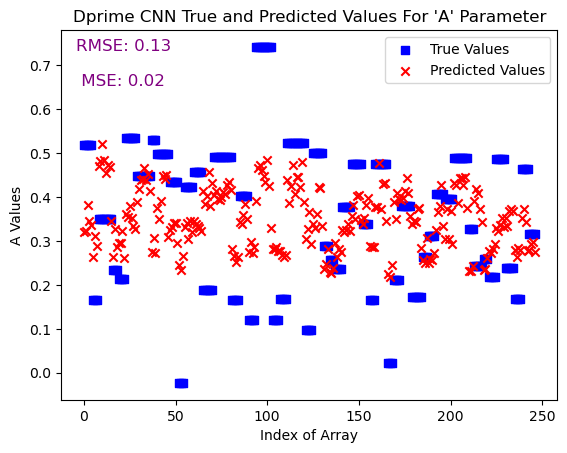

In [ ]:
import matplotlib.pyplot as plt
import numpy as np




# Create scatter plots for true and predicted values  
plt.scatter(range(len(numpy_test_dprime_label[:,0])), numpy_test_dprime_label[:,0], color='blue', label='True Values', marker='s')
plt.scatter(range(len(numpy_predictions[:,0])), numpy_predictions[:,0], color='red', label='Predicted Values', marker='x')

# Add labels and a legend
plt.xlabel('Index of Array')
plt.ylabel('A Values')
plt.title("Dprime CNN True and Predicted Values For 'A' Parameter")
plt.legend(loc='upper right')
plt.text(0.03, 0.85, 'RMSE: 0.13 \n\n MSE: 0.02', transform=plt.gca().transAxes, fontsize=12, color='Purple')
# Show the plot
plt.show()


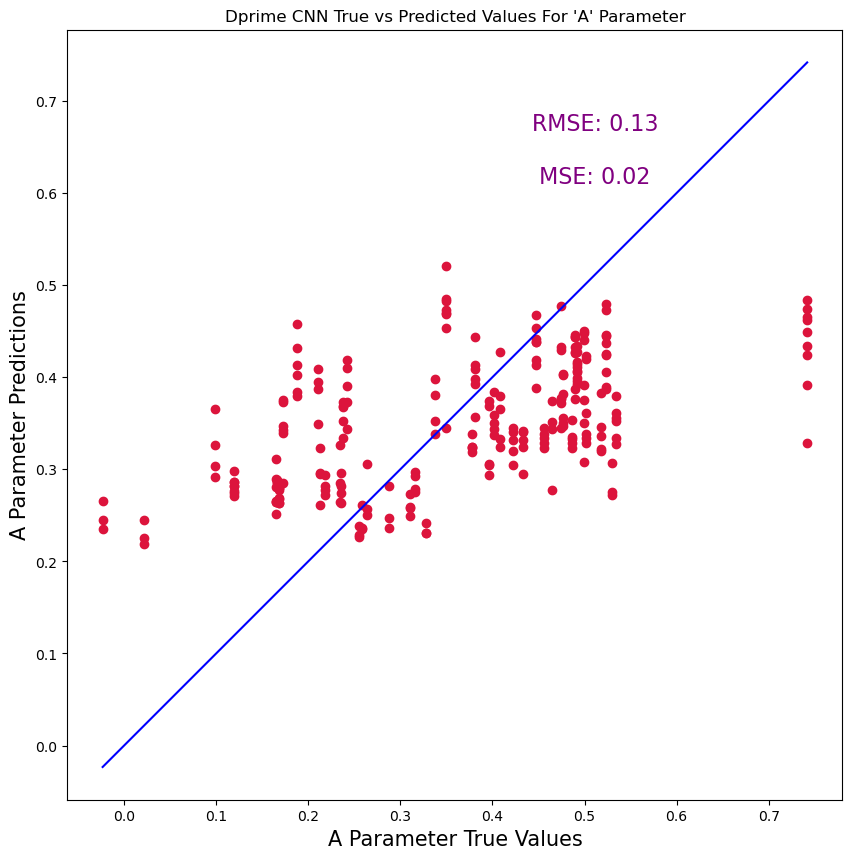

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(numpy_test_dprime_label[:,0], numpy_predictions[:,0], c='crimson')


p1 = max(max(numpy_predictions[:,0]), max(numpy_test_dprime_label[:,0]))
p2 = min(min(numpy_predictions[:,0]), min(numpy_test_dprime_label[:,0]))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('A Parameter True Values', fontsize=15)
plt.ylabel('A Parameter Predictions', fontsize=15)
plt.title("Dprime CNN True vs Predicted Values For 'A' Parameter")
plt.text(0.6, 0.8, 'RMSE: 0.13 \n\n MSE: 0.02', transform=plt.gca().transAxes, fontsize=16, color='Purple')
plt.axis('equal')
plt.show()

In [ ]:
from modules.validate import *
rmse = root_mean_squared_error(numpy_predictions[:,0], numpy_test_dprime_label[:,0]) # Linh's function   ([:,0] = first column of all values/ A label since model wasn't sensing b and c)
print(f'Root Mean Squared Error: {rmse}')

mse = mean_squared_error(numpy_test_dprime_label[:,0], numpy_predictions[:,0]) # Scikit Learn's function
print(f'Mean Squared Error: {mse}')

Root Mean Squared Error: 0.13363188066453044
Mean Squared Error: 0.017857479529939303


In [ ]:
# Maybe train another model for dprime b and c or just tune the one I have to predict b and c
# Maybe I should try r^2 data set. Try and see how it goes for that and if it doesn't do well, try and tune dprime model for just b or c

In [ ]:
numpy_predictions
numpy_test_dprime_label
numpy_test_tensor

array([[[[0, 0],
         [0, 0],
         [0, 0],
         ...,
         [0, 0],
         [0, 0],
         [0, 0]],

        [[0, 1],
         [0, 0],
         [0, 0],
         ...,
         [0, 1],
         [0, 1],
         [0, 0]],

        [[0, 0],
         [0, 0],
         [0, 0],
         ...,
         [0, 0],
         [0, 1],
         [0, 0]],

        ...,

        [[0, 1],
         [0, 0],
         [0, 0],
         ...,
         [0, 1],
         [0, 1],
         [0, 0]],

        [[0, 0],
         [0, 0],
         [0, 0],
         ...,
         [0, 0],
         [0, 0],
         [0, 1]],

        [[0, 0],
         [0, 0],
         [0, 0],
         ...,
         [0, 0],
         [0, 0],
         [0, 1]]],


       [[[1, 0],
         [0, 0],
         [0, 0],
         ...,
         [0, 0],
         [0, 0],
         [0, 0]],

        [[0, 0],
         [0, 1],
         [0, 1],
         ...,
         [0, 1],
         [0, 0],
         [0, 0]],

        [[0, 0],
         [0, 0],
      

In [ ]:
Dprime_model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 20, 148, 64)       704       
                                                                 
 dropout (Dropout)           (None, 20, 148, 64)       0         
                                                                 
 conv1d_1 (Conv1D)           (None, 20, 146, 32)       6176      
                                                                 
 conv1d_2 (Conv1D)           (None, 20, 73, 16)        1040      
                                                                 
 average_pooling2d (AverageP  (None, 1, 73, 16)        0         
 ooling2D)                                                       
                                                                 
 average_pooling2d_1 (Averag  (None, 1, 18, 16)        0         
 ePooling2D)                                            

In [ ]:
Dprime_model_dos = tf.keras.models.load_model('./results/Dprime_model_trying_to_get_three_outputs')

new_pred = np.array(Dprime_model_dos.predict(numpy_test_tensor))

8/8 [==============================] - 0s 47ms/step


In [ ]:
new_pred[0:5]

array([[ 0.3165539 , -0.11592791,  0.00286335],
       [ 0.32106897, -0.11894948,  0.0026078 ],
       [ 0.39635545, -0.1493438 ,  0.00301951],
       [ 0.3484411 , -0.12950434,  0.00308803],
       [ 0.33967832, -0.12503938,  0.00525489]], dtype=float32)

In [ ]:
numpy_test_dprime_label[0:5]

array([[ 0.5180807 , -0.21010151,  0.01882902],
       [ 0.5180807 , -0.21010151,  0.01882902],
       [ 0.5180807 , -0.21010151,  0.01882902],
       [ 0.5180807 , -0.21010151,  0.01882902],
       [ 0.5180807 , -0.21010151,  0.01882902]])

In [ ]:
rmse = root_mean_squared_error(new_pred[:,0], numpy_test_dprime_label[:,0]) 
print(f'Root Mean Squared Error A: {rmse}')

rmse = root_mean_squared_error(new_pred[:,1], numpy_test_dprime_label[:,1]) 
print(f'Root Mean Squared Error B: {rmse}')

rmse = root_mean_squared_error(new_pred[:,2], numpy_test_dprime_label[:,2]) 
print(f'Root Mean Squared Error C: {rmse}')

rmse = root_mean_squared_error(new_pred, numpy_test_dprime_label) 
print(f'\nRoot Mean Squared Error of All Parameters Together: {rmse}')

Root Mean Squared Error A: 0.13289396457230435
Root Mean Squared Error B: 0.058618903179840434
Root Mean Squared Error C: 0.008812330269892038

Root Mean Squared Error of All Parameters Together: 0.08401317117876625


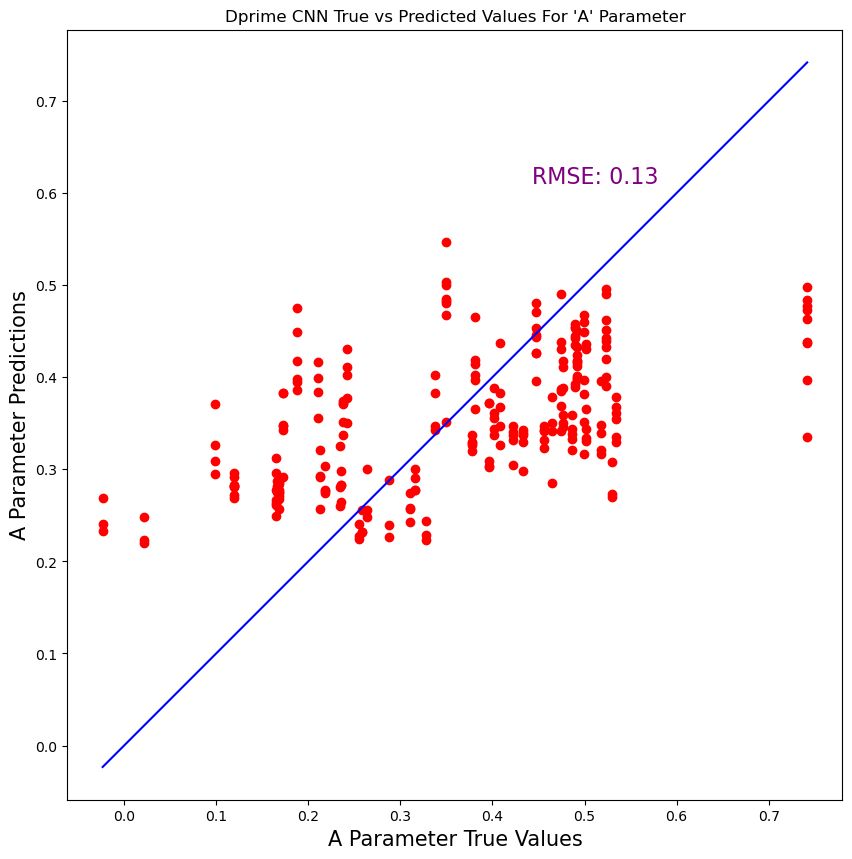

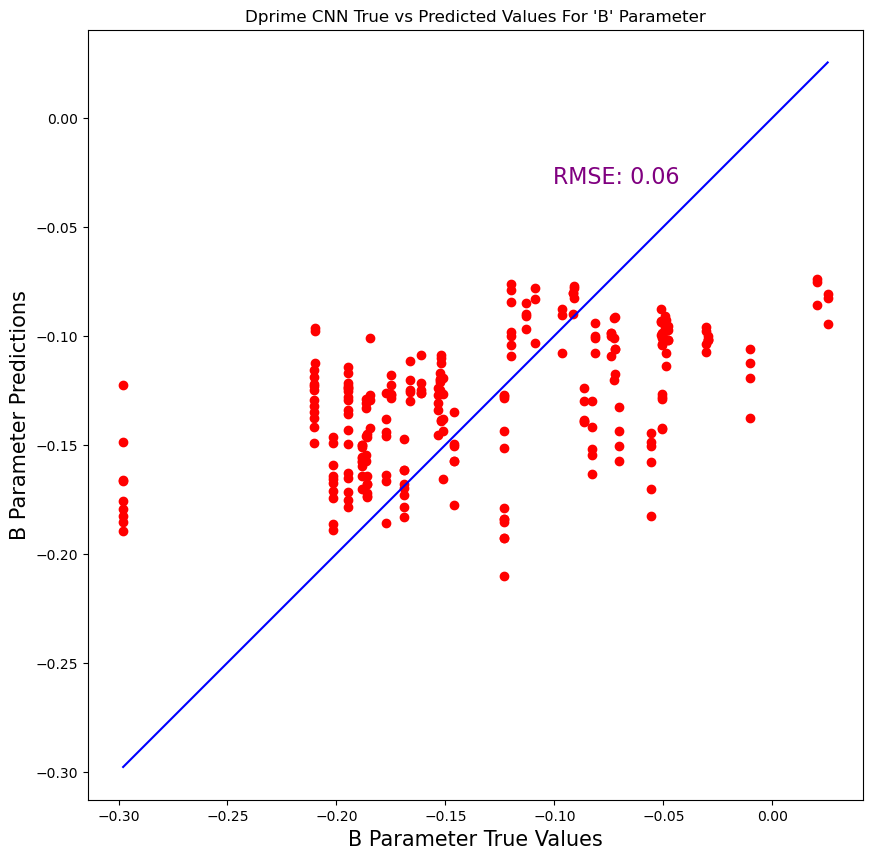

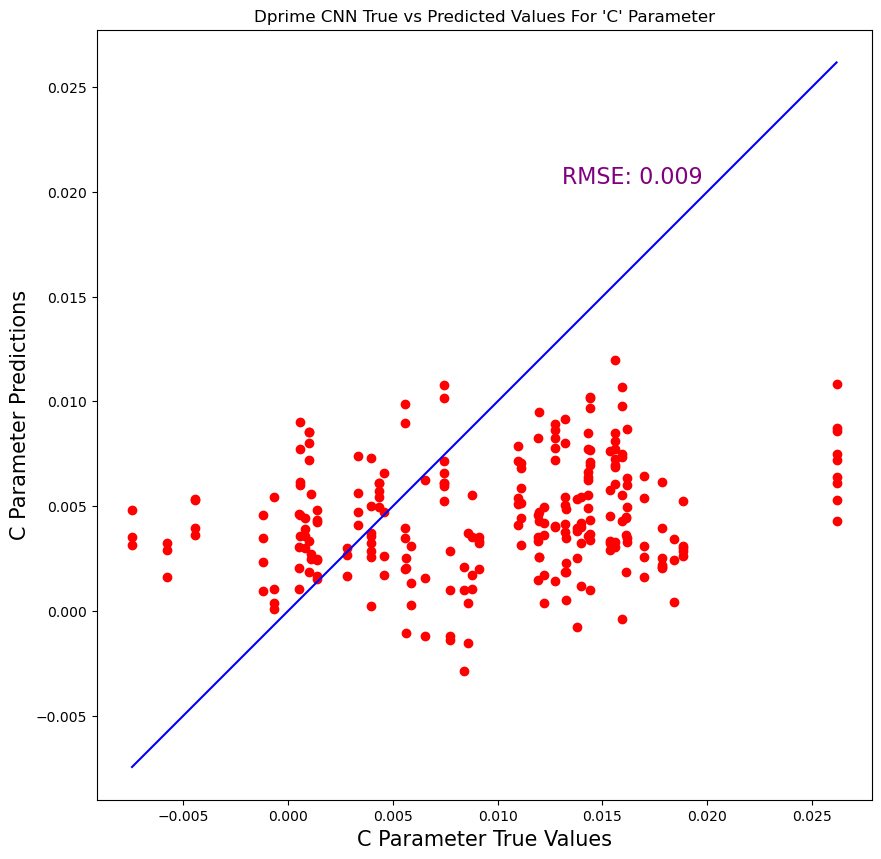

In [ ]:
# A parameter accuracy graph
plt.figure(figsize=(10,10))
plt.scatter(numpy_test_dprime_label[:,0], new_pred[:,0], c='red')


p1 = max(max(new_pred[:,0]), max(numpy_test_dprime_label[:,0]))
p2 = min(min(new_pred[:,0]), min(numpy_test_dprime_label[:,0]))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('A Parameter True Values', fontsize=15)
plt.ylabel('A Parameter Predictions', fontsize=15)
plt.title("Dprime CNN True vs Predicted Values For 'A' Parameter")
plt.text(0.6, 0.8, 'RMSE: 0.13' , transform=plt.gca().transAxes, fontsize=16, color='Purple')
plt.axis('equal')
plt.show()




# B parameter accuracy graph
plt.figure(figsize=(10,10))
plt.scatter(numpy_test_dprime_label[:,1], new_pred[:,1], c='red')


p1 = max(max(new_pred[:,1]), max(numpy_test_dprime_label[:,1]))
p2 = min(min(new_pred[:,1]), min(numpy_test_dprime_label[:,1]))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('B Parameter True Values', fontsize=15)
plt.ylabel('B Parameter Predictions', fontsize=15)
plt.title("Dprime CNN True vs Predicted Values For 'B' Parameter")
plt.text(0.6, 0.8, 'RMSE: 0.06', transform=plt.gca().transAxes, fontsize=16, color='Purple')
plt.axis('equal')
plt.show()



# C parameter accuracy graph
plt.figure(figsize=(10,10))
plt.scatter(numpy_test_dprime_label[:,2], new_pred[:,2], c='red')


p1 = max(max(new_pred[:,2]), max(numpy_test_dprime_label[:,2]))
p2 = min(min(new_pred[:,2]), min(numpy_test_dprime_label[:,2]))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('C Parameter True Values', fontsize=15)
plt.ylabel('C Parameter Predictions', fontsize=15)
plt.title("Dprime CNN True vs Predicted Values For 'C' Parameter")
plt.text(0.6, 0.8, 'RMSE: 0.009', transform=plt.gca().transAxes, fontsize=16, color='Purple')
plt.axis('equal')
plt.show()